In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import numpy as np

Loading the low contrast image:

Text(0.5, 1.0, 'low Contrast Image')

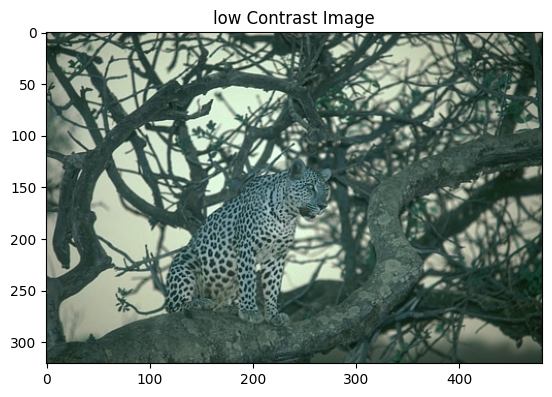

In [ ]:
second_image = cv2.imread('/content/drive/MyDrive/CA01_images/low_contrast_image.png')
plt.imshow(second_image)
plt.title('low Contrast Image')

### **b:**

Calculating and plotting the image's histogram:

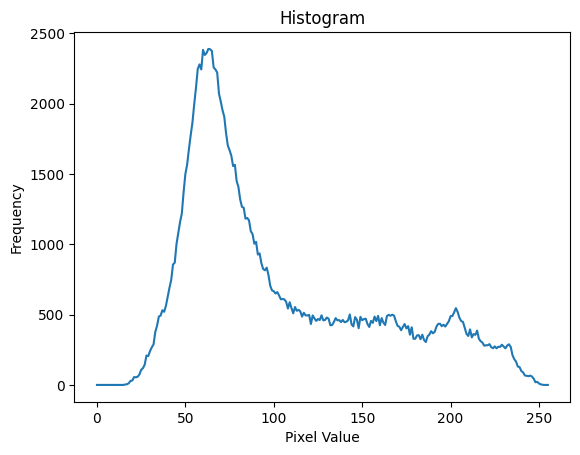

In [ ]:
second_image = cv2.imread('/content/drive/MyDrive/CA01_images/low_contrast_image.png',0)
hist = cv2.calcHist([second_image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

The relation between the image's contrast and its histogram:

In a low-contrast image, there is not much difference in brightness between different parts of the image, because the pixel values are in a narrow range of the grayscale. So, the histogram tends to be narrow and clustered towards the center.

### **c:**

calculating and plotting the CDF of the histogram:

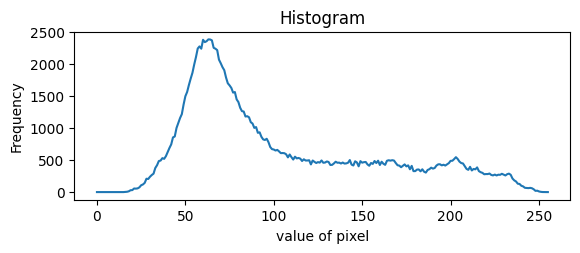

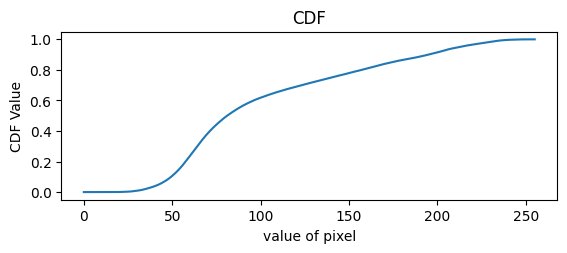

In [ ]:
cdf = hist.cumsum()
cdf = cdf / cdf.max()

plt.subplot(2,1,1)
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('value of pixel')
plt.ylabel('Frequency')
plt.show()

print('\n')

plt.subplot(2,1,2)
plt.plot(cdf)
plt.title('CDF')
plt.xlabel('value of pixel')
plt.ylabel('CDF Value')
plt.show()

As it can be seen, it is an appropriate equalization function because the CDF plot is nearly flat and gradually rises from 0 to 1 (if normalized), so the values are well-distributed.

### **d:**

Applying the CDF as a transformation function to the image:

In [ ]:
normalized_cdf = np.rint (cdf/((np.amax(cdf) - np.amin(cdf))/255))
apply_cdf = np.vectorize(lambda my_img: normalized_cdf[my_img])
transformed_image = apply_cdf(second_image)
transformed_hist = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])
transformed_image = cv2.cvtColor(transformed_image/255, cv2.COLOR_GRAY2RGB)


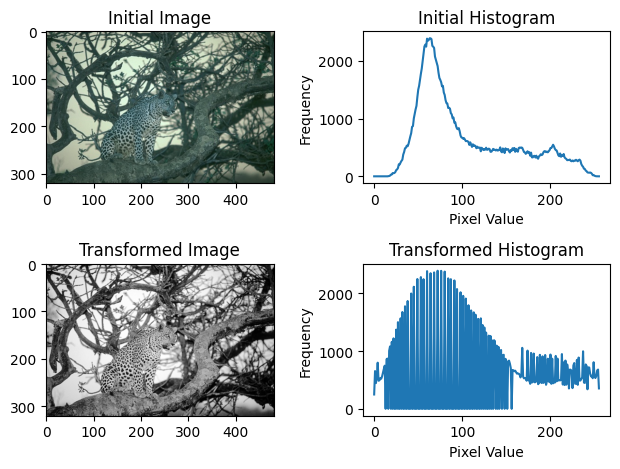

In [ ]:
second_image = cv2.imread('/content/drive/MyDrive/CA01_images/low_contrast_image.png')

plt.subplot(2,2,1)
plt.imshow(second_image)
plt.title('Initial Image')

plt.subplot(2,2,2)
plt.plot(hist)
plt.title('Initial Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


plt.subplot(2,2,3)
plt.imshow(transformed_image)
plt.title('Transformed Image')

print('\n')
plt.subplot(2,2,4)
plt.plot(transformed_hist)
plt.title('Transformed Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As it can be seen from the plots, the image's histogram has been equalized.